# WEIGHT

In [8]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv ('Data Collection for Regression.csv')

In [10]:
df.head()

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158.0,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180.0,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178.0,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152.4,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165.0,89


In [11]:
df.dtypes

Timestamp                 object
Age                        int64
Sex                       object
Height in (cm)           float64
Weight in (kilograms)      int64
dtype: object

In [12]:
df.shape

(100, 5)

In [13]:
df.dtypes

Timestamp                 object
Age                        int64
Sex                       object
Height in (cm)           float64
Weight in (kilograms)      int64
dtype: object

In [14]:
df['Height in (cm)'] = pd.to_numeric(df['Height in (cm)']);
df['Weight in (kilograms)'] = pd.to_numeric(df['Weight in (kilograms)']);



In [15]:
df.dtypes

Timestamp                 object
Age                        int64
Sex                       object
Height in (cm)           float64
Weight in (kilograms)      int64
dtype: object

In [16]:
df.isna().sum()

Timestamp                0
Age                      0
Sex                      0
Height in (cm)           0
Weight in (kilograms)    0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.drop(['Timestamp'], inplace = True, axis = 1)

<AxesSubplot:xlabel='Age', ylabel='count'>

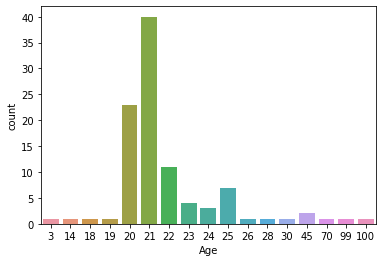

In [19]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

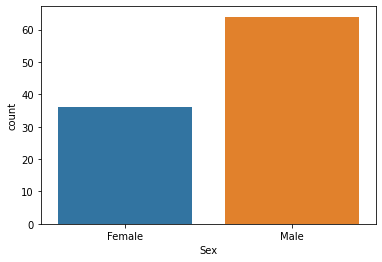

In [20]:
sns.countplot(df['Sex'])

In [21]:
df['Sex'] = df ['Sex'].map({'Male': 0,'Female':1})

In [22]:
df

,Age,Sex,Height in (cm),Weight in (kilograms)
0,21,1,158.0,47
1,20,0,180.0,54
2,20,0,178.0,85
3,21,0,152.4,43
4,21,0,165.0,89
...,...,...,...,...
95,30,0,200.0,50
96,22,0,174.0,65
97,21,0,160.0,45
98,25,0,175.0,65


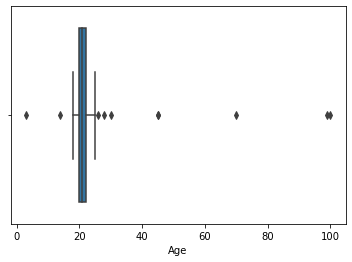

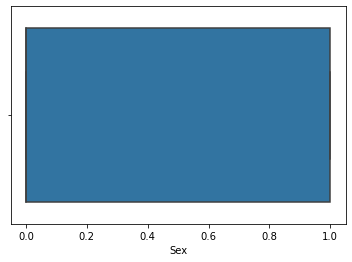

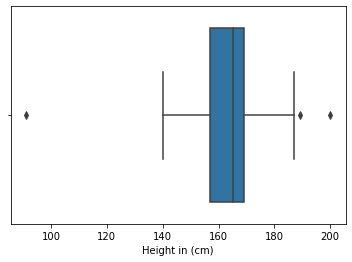

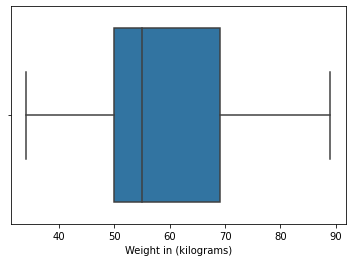

In [23]:
for col in df.columns:
    plt.figure();
    sns.boxplot(df[col])

In [24]:
#eliminate extreme values
def removeOutliers(col):
 q3 = df[col].quantile(0.75);
 q1 = df[col].quantile(0.25);
 iqr = q3 -q1;
 
 max_ = q3 + (iqr * 1.5);
 min_ = q1 - (iqr * 1.5);
 
 df.loc[df[col] > max_,col] = max_;
 df.loc[df[col] < min_,col] = min_;

In [25]:
for col in df.columns:
    removeOutliers(col)

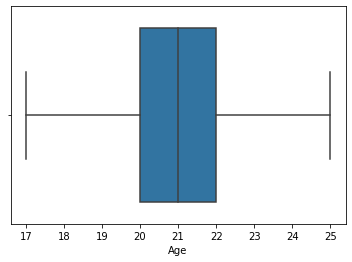

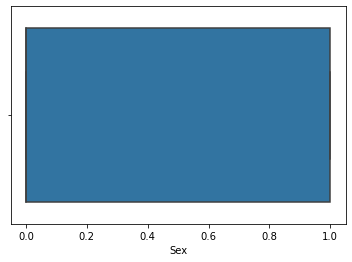

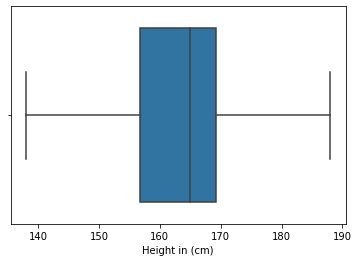

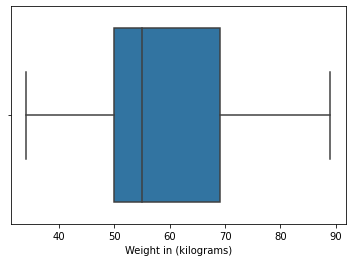

In [26]:
for col in df.columns:
    plt.figure();
    sns.boxplot(df[col])

<AxesSubplot:>

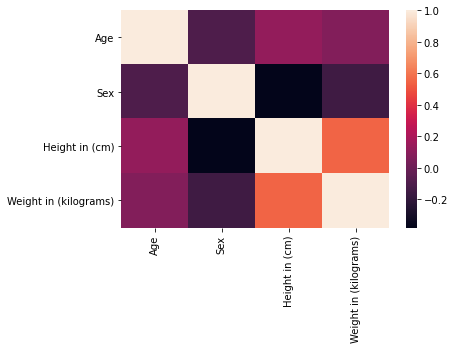

In [27]:
sns.heatmap(df.corr())

In [28]:
corr = df.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr,dtype=bool)))
corr_unstacked=corr_mask.unstack().sort_values(ascending = False);

corr_df=pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

#this is to check the features with correlation

In [29]:
corr_df

,,0


In [30]:
X= df.drop(['Weight in (kilograms)'],axis=1);
y= df['Weight in (kilograms)'];

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, train_size=.8);

In [32]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluate_model (model):
    y_pred =model.predict(X_test);
    print('R^2 score :', r2_score(y_test,y_pred));
    print('MAE :', mean_absolute_error(y_test,y_pred));
    print('RSME :', np.sqrt(mean_squared_error(y_test,y_pred)))
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()

R^2 score : 0.1106949136953781
MAE : 9.872663230799152
RSME : 12.530235950973987


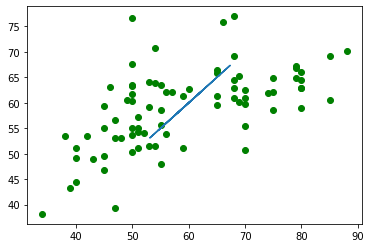

R^2 score : -0.08673486143353792
MAE : 10.884643919632728
RSME : 13.851463452866312


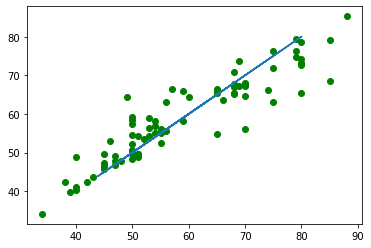

R^2 score : 0.20728382325173111
MAE : 9.05518556190077
RSME : 11.830217284771521


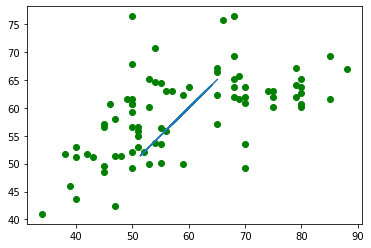

R^2 score : -4.426020887050891e+24
MAE : 27940717600989.72
RSME : 27953783064351.68


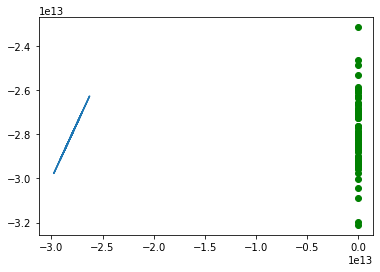

R^2 score : 0.20799973788963555
MAE : 9.076905267823125
RSME : 11.824874049036836


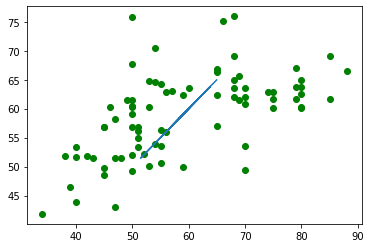

R^2 score : 0.06851138789687017
MAE : 10.472650016279658
RSME : 12.823974207195192


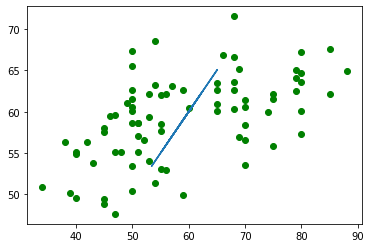

R^2 score : -0.22237000331026424
MAE : 12.348292350769043
RSME : 14.690453501659748


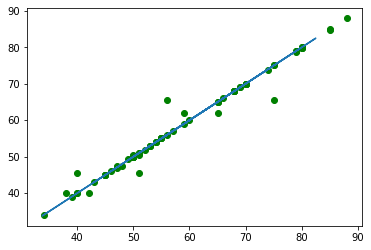

R^2 score : 0.14659815817504462
MAE : 9.533750526007546
RSME : 12.274693282285952


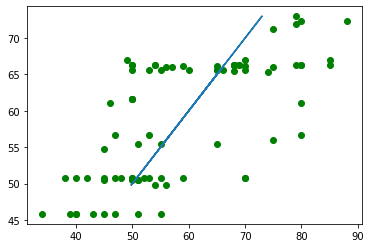

R^2 score : 0.1808432428318728
MAE : 9.583786904761903
RSME : 12.025893957541486


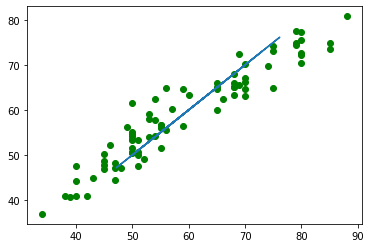

In [33]:
from sklearn.linear_model import LinearRegression;
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import ElasticNet;
from sklearn.linear_model import SGDRegressor;
from sklearn.linear_model import BayesianRidge;
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor;


models = [LinearRegression(),GradientBoostingRegressor(),ElasticNet(),SGDRegressor(),BayesianRidge(),KernelRidge(),XGBRegressor(),LGBMRegressor(),RandomForestRegressor()];

for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model)

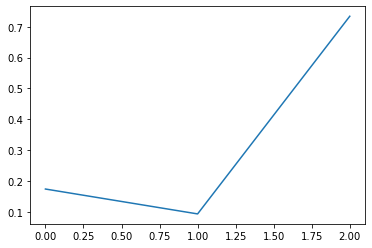

In [34]:
from sklearn.ensemble import RandomForestRegressor;

rf = RandomForestRegressor()
rf.fit(X_train,y_train);
plt.plot(rf.feature_importances_)

In [35]:
X.columns

Index(['Age', 'Sex', 'Height in (cm)'], dtype='object')

In [36]:
X= df.drop(['Weight in (kilograms)'],axis=1);
y= df['Weight in (kilograms)'];
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, train_size=.8);

In [37]:
from sklearn.preprocessing import MinMaxScaler;

scaler = MinMaxScaler();
X_scaled = X.copy();

for col in X.columns:
        X_scaled[col]= scaler.fit_transform(X_scaled[col].values.reshape(-1,1));

R^2 score : 0.1106949136953781
MAE : 9.872663230799152
RSME : 12.530235950973987


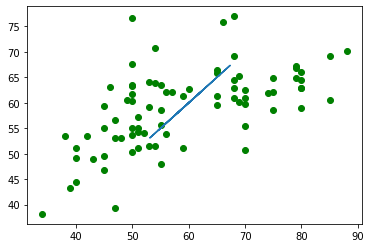

R^2 score : -0.0895740367543938
MAE : 10.92414808417288
RSME : 13.869545637438462


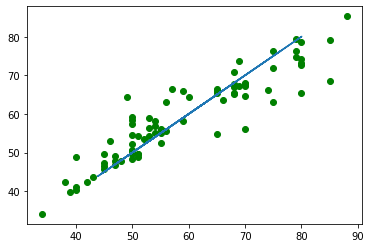

R^2 score : 0.20728382325173111
MAE : 9.05518556190077
RSME : 11.830217284771521


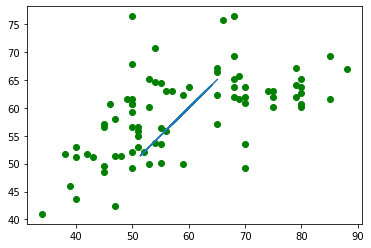

R^2 score : -1.2219532702998298e+24
MAE : 14682371629046.348
RSME : 14687949137692.264


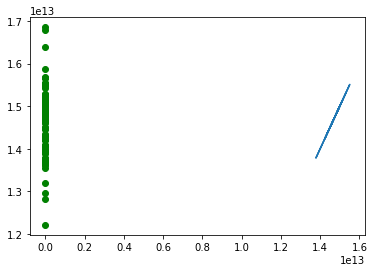

R^2 score : 0.20799973788963555
MAE : 9.076905267823125
RSME : 11.824874049036836


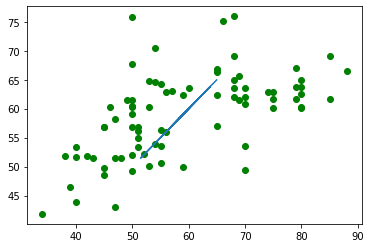

R^2 score : 0.06851138789687017
MAE : 10.472650016279658
RSME : 12.823974207195192


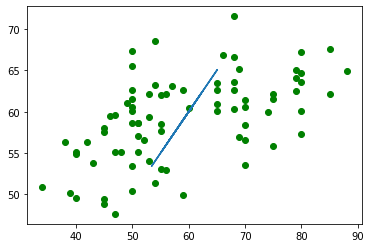

R^2 score : -0.22237000331026424
MAE : 12.348292350769043
RSME : 14.690453501659748


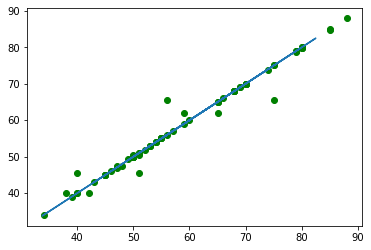

R^2 score : 0.14659815817504462
MAE : 9.533750526007546
RSME : 12.274693282285952


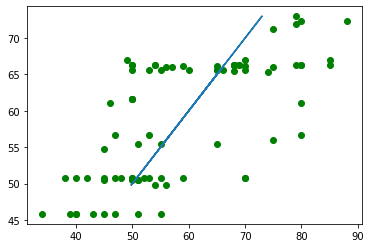

R^2 score : 0.2064243266688437
MAE : 9.38615119047619
RSME : 11.836628959573568


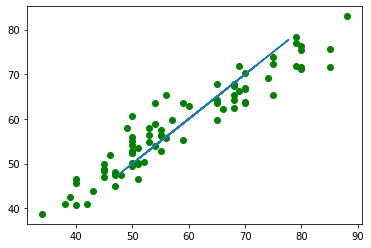

In [38]:
for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model)

In [40]:
import pickle;

dbfile = open ('weightmodel.sav','wb');

pickle.dump(rf,dbfile);